# DRP1 and Mito CoLocalization
_Maydan Wienreb_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [51]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Imports

In [52]:
"""
This will enable completion on elements of lists, results of function calls, etc.
However, be warned that enabling this option can be unsafe, because the code is actually evaluated upon hitting TAB
"""
%config IPCompleter.greedy=True

from typing import Dict, Tuple, List

# import numpy
import numpy as np
np.random.seed(0) # Remmeber to reset the seed every time if you expect the second draw to be the same as the first.

#import pandas
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import graphics
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# %load_ext autoreload
# %autoreload 1
# %aimport TestFunctions
## See: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html


In [53]:
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
sns.set_style("whitegrid")

In [54]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [55]:
import types
import sys
print ("Basic packages versions:")
print ("   Python version: %s" % (sys.version))
print ("   Packages:")


try:  
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))
except: 
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))

Basic packages versions:
   Python version: 3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
   Packages:
   json: 2.0.9
   numpy: 1.15.0
   pandas: 0.23.3
   seaborn: 0.9.0


# General

In [56]:
patients = {"AV": {'age': 6*4, "gender": "M", "color": "cornflowerblue"}, 
            "EV": {"age": 5.5*12*4, "gender": "F", "color": "violet"},
            "HC CM": {"age": 6*12*4, "gender": "F", "color": "green"},
            "AG044": {"age": 15, "gender": "F", "color": "limegreen"},
            "AG015": {"age": 3/7, "gender": "M", "color": "cyan"},
            "HV": {"age": 37*12*4, "gender": "F", "color": "darkviolet"},
            "MV": {"age": 36.5*12*4, "gender": "M", "color": "royalblue"},
            "HC IK": {"age": 32*12*4, "gender": "F", "color": "gray"},
            "HC OZ": {"age": 35*12*4, "gender": "M", "color": "yellow"},
            "HC NA0730":{"age": 53*12*4, "gender": "M", "color": "coral"}}
patients_df = pd.DataFrame(patients).T
patients_df

age           color gender
AV               24  cornflowerblue      M
EV              264          violet      F
HC CM           288           green      F
AG044            15       limegreen      F
AG015      0.428571            cyan      M
HV             1776      darkviolet      F
MV             1752       royalblue      M
HC IK          1536            gray      F
HC OZ          1680          yellow      M
HC NA0730      2544           coral      M

In [57]:
col_map = {2:"AV", 3:"EV", 4:"HC CM", 5:"AG044", 6:"AG015", 7:"HV", 8:"MV", 9:"HC IK", 10:"HC OZ", 11:"HC NA0730"}
col_map

{2: 'AV',
 3: 'EV',
 4: 'HC CM',
 5: 'AG044',
 6: 'AG015',
 7: 'HV',
 8: 'MV',
 9: 'HC IK',
 10: 'HC OZ',
 11: 'HC NA0730'}

# Common Functions

In [58]:
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource, CategoricalColorMapper, LabelSet
from bokeh.palettes import Set3
from bokeh.palettes import d3
from bokeh.models.tools import HoverTool
from bokeh.models import NumeralTickFormatter


def plot_column(df, column_name, agg='50%'):

    TOOLS='pan,wheel_zoom,box_zoom,reset'

    source = ColumnDataSource(df)
    patients_names =  source.data['patient'].tolist()
    plot_options = dict(width=750, plot_height=350,tools=TOOLS)
    p = figure(**plot_options, x_range=patients_names)


    # palette = d3['Category10'][len(patients_names)]
    # palette = [patients[pn]['color'] for pn in patients_names]
    # color_map = CategoricalColorMapper(factors=patients_names, palette=palette)
    
    source.data['color'] = [patients[pn]['color'] for pn in patients_names]
    source.data['age'] = [patients[pn]['age']/4/12 for pn in patients_names]
    source.data['gender'] = [patients[pn]['gender'] for pn in patients_names]
    
    cell_count = df["patient"].count().to_dict()
    source.data['cell_count'] = [cell_count[pn] for pn in patients_names]

    # renderer = p.vbar(x='Pcol', top='Cox17 IxA_50%', width=0.95, line_color="gray", source=source, color={'field': 'Pcol', 'transform': color_map})
    renderer = p.vbar(x='patient', top=f"{column_name}_{agg}", width=0.95, line_color="gray", source=source, color='color')
    
    source.data[f"formatted_{column_name}_{agg}"] = [f"{x:,.4f}" if x<10 else f"{x:,.0f}" for x in source.data[f"{column_name}_{agg}"]]
    labels = LabelSet(x='patient', y=f"{column_name}_{agg}", text=f"formatted_{column_name}_{agg}", level='glyph',
        x_offset=-30, y_offset=0, source=source, render_mode='canvas')
    p.add_layout(labels)

    p.add_tools(HoverTool(tooltips= [("Name", "@patient"), ("Age", "@age"), ("Gender", "@gender"), ("Cell count", "@cell_count")], renderers=[renderer], mode='mouse'))
    p.yaxis[0].formatter = NumeralTickFormatter(format="0,0.00")

    show(p)

## Runinng CellDoctor

In [59]:
# Define the protocol

channel_map = {"DAPI - DAPI": "NucliChannel",
               "Cy5 - Cy5": "MitoTrackerChannel",
               "Cy3 - Cy3": ["SemiCytoChannel", "ActinChannel"],
               "FITC - FITC": "Drp1Channel",
               "DataExtractors": [{"class": "NucliDataExtractor", "data_sources": ["Nucli"],
                       "trigger_after": "Nucli"},
                      {"class": "NucliCytoDataExtractor", "data_sources": ["Nucli", "Cyto"],
                       "trigger_after": "Nucli"},
                      {"class": "SemiCytoImageUnification", "data_sources": ["Cyto", "Nucli", "Drp1", "MitoTracker"],
                       "trigger_after": "Nucli"},
                      {"class": "CytoDataExtractor", "data_sources": ["Cyto"],
                       "trigger_after": "Cyto"},
                      {"class": "MitoTrackerDataExtractor", "data_sources": ["MitoTracker"],
                       "trigger_after": "MitoTracker"},                                 
                      {"class": "AntiBodyDataExtractor", "data_sources": ["Drp1"],
                       "trigger_after": "Drp1"},
                      {"class": "AntiBodyCoLocalizationDataExtractor", "data_sources": ["Drp1", "Nucli"],
                       "trigger_after": "Drp1"},
                      {"class": "AntiBodyCoLocalizationDataExtractor", "data_sources": ["Drp1", "MitoTracker"],
                       "trigger_after": "Drp1"}
                      ]
               }


In [60]:
# Running folder loader
import os, sys
segmenter_path = "C:\\Code\\CellDoctor"
sys.path.append(segmenter_path) 

from Segmenter.FolderLoader import FolderLoader 


images_path = "F:\\BioData\\GFER_DRP1_Mito\\drp1to1700htt1to500fibHD_drp11to500fitcmitocy5_1\\"
# FolderLoader(images_path, protocol_channel_map=channel_map, parallel_processing=False)

In [61]:
from Segmenter.DataProcessor.ImageDataUnifier import ImageDataUnifier

results_path = 'C:\\BioData\\GFER\GFER_DRP1_Mito\\drp1to1700htt1to500fibHD_drp11to500fitcmitocy5_1\\results'


unification_protocol = [("base", {"ch_type": "Nucli"}),
                                 ("join", {"ch_type": "Cyto", "full_tbl_fld": "cyto_label"}),
                                 ("join", {"ch_type": "Drp1", "full_tbl_fld": "cyto_label"}),
                                 ("join_1_agg", {"ch_type": "MitoTracker", "full_tbl_fld": "cyto_label",
                                               "largest_key": 'MitoTracker_size'}),
                        ]

# ImageDataUnifier(folder_path=results_path,unification_protocol=unification_protocol)

# Loading the data

In [62]:
data_path = "./Data/DRP1-Mito CoLocalization 20181230/agg_results.csv"
df = pd.read_csv(data_path, index_col=0)
df = df.drop(labels='index', axis=1)
df = df[df.nuc_outlier==False]
df = df[df.cyto_outlier==False]
df = df[df.Cyto_border_case==False]
df = df.drop(labels=['nuc_outlier', 'cyto_outlier', 'Cyto_border_case'], axis=1)

In [63]:
df["patient"] = df.column.map(col_map)

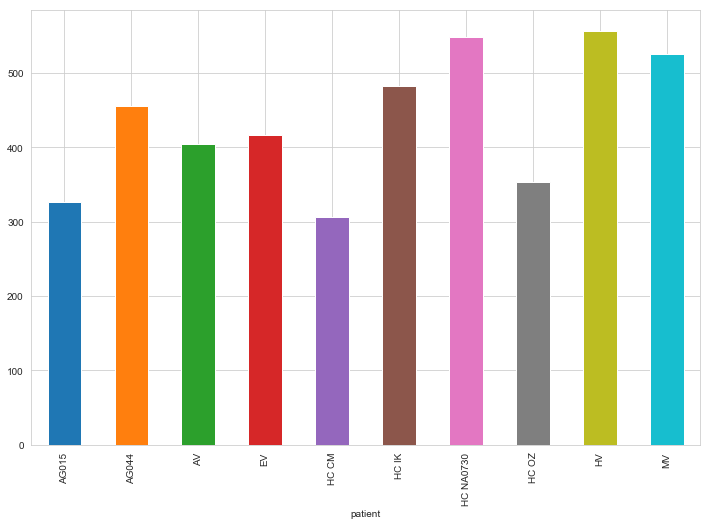

In [64]:
cell_in_well = df.groupby(["patient"])["row"].count()
cell_in_well.plot(kind='bar')

In [65]:
plot_column(df.groupby(["patient"]), 'Cyto_size')

In [66]:
plot_column(df.groupby(["patient"]), 'Drp1_size')

In [67]:
plot_column(df.groupby(["patient"]), 'Drp1_in_MitoTracker_size')

In [68]:
plot_column(df.groupby(["patient"]), 'Drp1_in_Nucli_size')

In [69]:
df["Drp1_size*"] = df['Drp1_size']/df['Cyto_size']
plot_column(df.groupby(["patient"]), 'Drp1_size*')

In [70]:
df["Drp1_outside_Nucli_percent"] = df['Drp1_outside_Nucli_size']/df['Drp1_size']

plot_column(df.groupby(["patient"]), 'Drp1_outside_Nucli_percent')

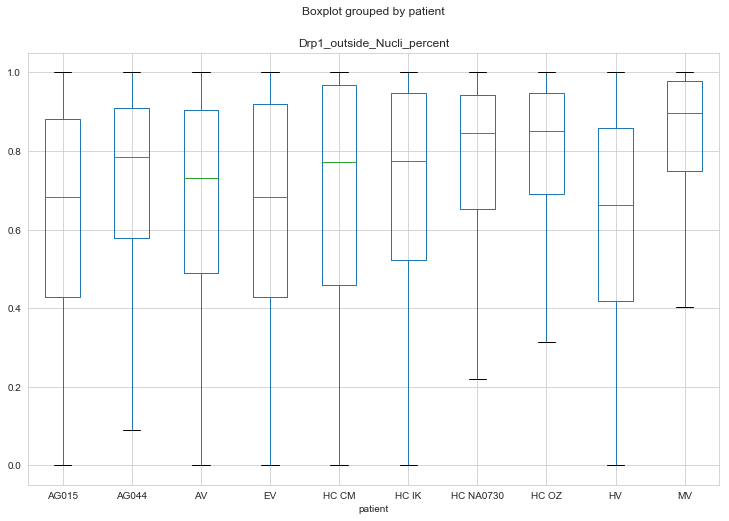

In [71]:
df.boxplot(column="Drp1_outside_Nucli_percent", by='patient', showfliers=False)

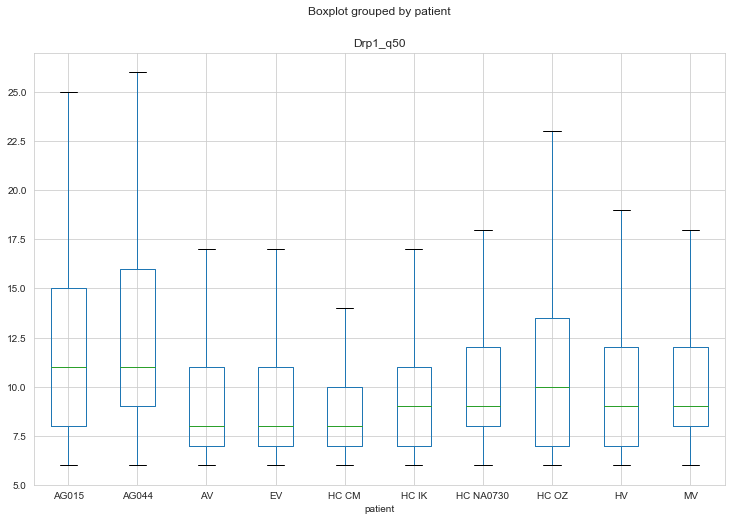

In [72]:
df.boxplot(column="Drp1_q50", by='patient', showfliers=False)

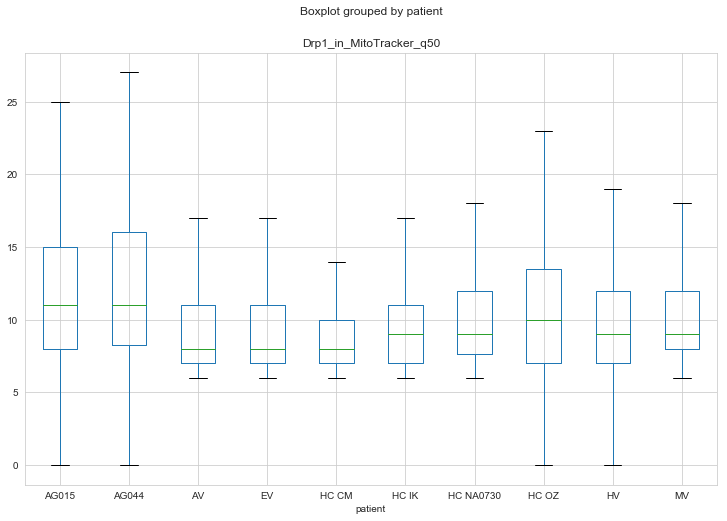

In [73]:
df.boxplot(column="Drp1_in_MitoTracker_q50", by='patient', showfliers=False)

Alon is significantly different from his control but Ella looks like Alon but also like CM.
Lower Drp1 was not expected by theory. 
These results are unclear to me, at the moment. I think and more healthy and repeats are needed

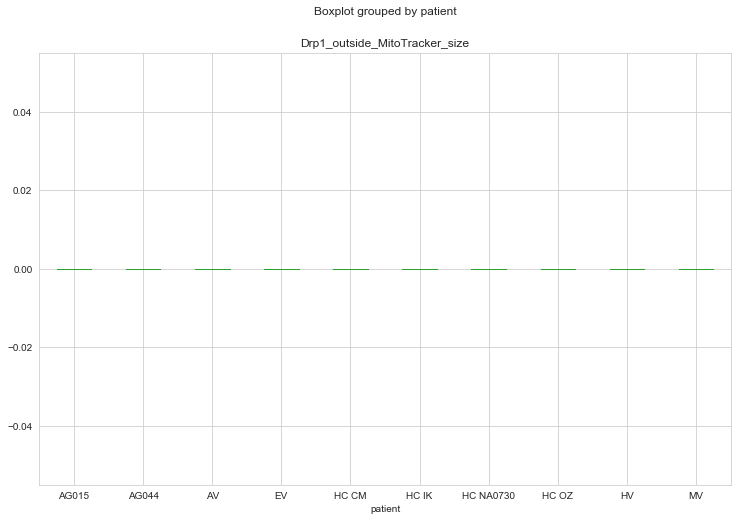

In [74]:
df.boxplot(column="Drp1_outside_MitoTracker_size", by='patient', showfliers=False)

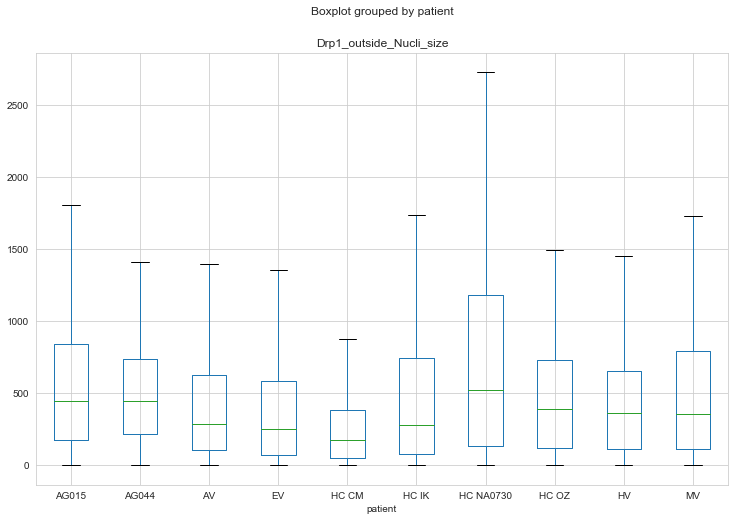

In [75]:
df.boxplot(column="Drp1_outside_Nucli_size", by='patient', showfliers=False)

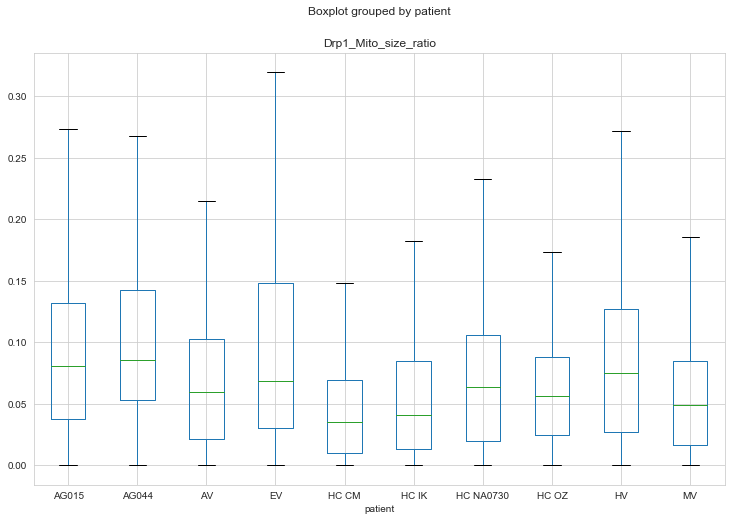

In [80]:
df["Drp1_Mito_size_ratio"] = df['Drp1_size']/df['MitoTracker_area_sum']
df.boxplot(column="Drp1_Mito_size_ratio", by='patient', showfliers=False)
# df.columns.tolist()